### Import the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#### Importing the boston house price dataset

In [5]:
hpd = pd.read_csv('./boston.csv')
hpd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
hpd.shape

(506, 14)

In [8]:
hpd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Ststistical measure of dataset
hpd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### understanding the correlation between various features of dataset

In [10]:
correlation = hpd.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

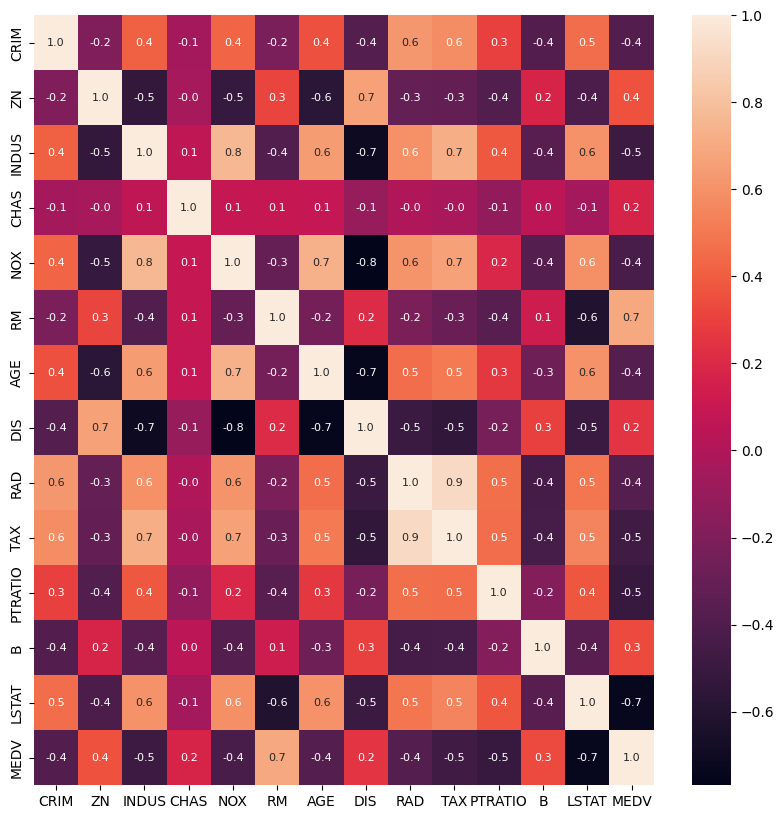

In [13]:
# Constructing the heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8})

#### splitting the data and target

In [15]:
X = hpd.drop(['MEDV'],axis=1)
Y = hpd['MEDV']

In [16]:
X, Y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

#### Splitting the data into training and test data

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=3,test_size=0.25)

In [20]:
X.shape, xtrain.shape, xtest.shape

((506, 13), (379, 13), (127, 13))

In [21]:
Y.shape, ytrain.shape, ytest.shape

((506,), (379,), (127,))

#### XGBoost Regressor

In [22]:
# Load the model
model = XGBRegressor()

In [23]:
# training the model with X_train
model.fit(xtrain,ytrain)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### Prediction on training data

In [ ]:
# Accuracy for prediction on training data
training_predict = model.predict(xtrain)
print(training_predict)

[35.408806  13.506874  20.601372  24.694574  21.901606  17.1169
 23.611729  21.100767  15.582262  18.524286   8.299322  14.524124
 23.911205  11.826596  24.579632  24.800108  18.732546  17.90168
 48.797966  13.013598  29.597672  18.00498   20.099442  17.2983
 23.093914  22.591875  13.802328  43.802635  35.197113  22.601181
 17.426325  48.499218  31.504051  15.601802  14.208061  20.599596
 22.023935  20.102371  17.584564  23.694658  14.105277  19.80486
 24.404297  33.39997   39.79925   34.90577   24.775457  14.603816
 23.38565   33.817646  23.886908   9.600155  21.77537   31.60645
 14.4980755  7.2008543 24.101517  21.395979  17.195942  46.002037
 23.124598  14.500953  20.49808   17.002157  48.292164  30.482553
 20.597412  20.205473  27.090982  19.71689   24.69376   31.100273
 22.302376  29.80274   13.60246   28.705849  21.447403  13.397678
 16.594982  19.989407  24.208899  20.587063  20.294321  12.71093
 18.903713  17.790264   7.0264077 16.080395  22.50053   18.311926
 13.891786  49.984

In [31]:
# R squared error
score1 = metrics.r2_score(ytrain,training_predict)

# Mean Absolute Error
score2 = metrics.mean_absolute_error(ytrain, training_predict)

print("R squared error : ", score1)

print("Mean Absolute error : ", score2)

R squared error :  0.99999791204787
Mean Absolute error :  0.009482195006196927


In [34]:
# Accuracy for prediction on training data
test_predict = model.predict(xtest)
print(test_predict)

[43.520508  17.97685   14.492034  32.030003  22.119923  20.570608
 13.7911825  7.496592  22.906689  15.326596  15.921147  28.28013
 36.890926  24.304592   5.9762735 10.700272  20.480717  13.630427
 12.57032   23.883453  20.77129   46.45698   23.61554   25.104624
 12.463319  23.98819   20.516035  21.47257   19.461634  21.479586
 13.200899  35.27161   17.994415  23.008041  17.349718  12.623266
 24.131824  31.681551  20.031672  22.487535  13.596638   9.496987
 23.268232  16.541798  20.718403  26.903505  21.244946  18.226753
 27.039938  20.162865  27.629961  21.24572   48.46006   20.10442
 21.06413   19.220135  50.313843  14.810595  30.868587  20.19853
 19.529457  22.702518  32.385807  32.101807  22.301245  22.31851
 32.59938   22.089005  27.391676  25.591965  25.041262  24.8875
 17.02369   29.150902   9.28874   19.377476  20.064857  25.984337
 22.093939  15.688928  26.470163  16.068846  15.178883  20.537663
 26.699123  12.793527  24.68203   11.473952  20.579533  23.605835
 20.918428  20.1

In [35]:
# R squared error
score3 = metrics.r2_score(ytest,test_predict)

# Mean Absolute Error
score4 = metrics.mean_absolute_error(ytest, test_predict)

print("R squared error : ", score3)

print("Mean Absolute error : ", score4)

R squared error :  0.8712301835041603
Mean Absolute error :  2.3649920493598993


#### Visualizing the actual prices and predicted prices

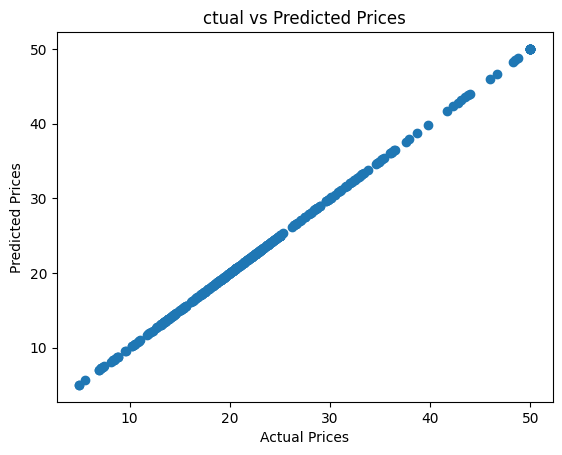

In [38]:
plt.scatter(ytrain,training_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("ctual vs Predicted Prices")
plt.show()

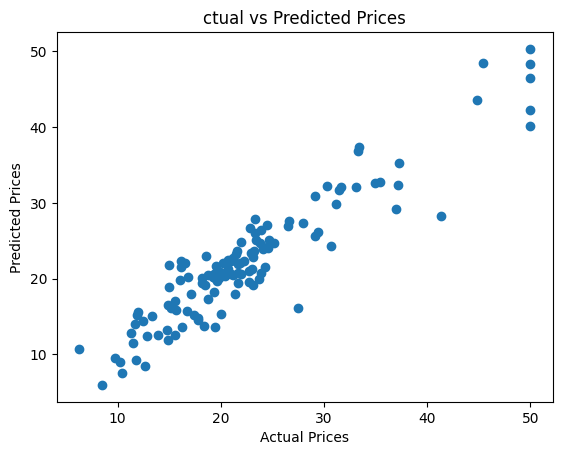

In [37]:
plt.scatter(ytest,test_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("ctual vs Predicted Prices")
plt.show()